# Homework 5
### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [1]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Compute the best frequencies
#@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

# plot phased light curves 
def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 

In [2]:
# Load the dataset
data = fetch_LINEAR_sample()

 - computing power for 18525697 (211 points)
 - computing power for 10022663 (246 points)
 - computing power for 14752041 (253 points)
 - computing power for 1009459 (593 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - omega_0 = 10.82722772
 - omega_0 = 10.20062676
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277


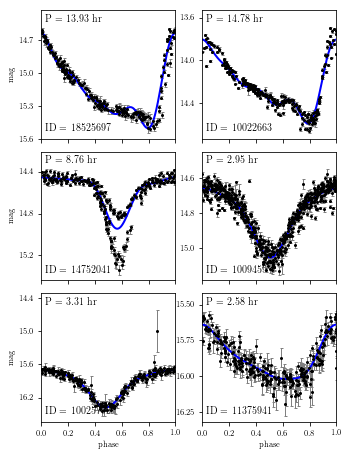

In [3]:
# select a subset of the full dataset
ids = [18525697,10022663, 14752041, 1009459, 10025796, 11375941]

# Compute the best frequencies
results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(results, ids)

## Solution

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astropy.io import ascii
import random
from matplotlib.pyplot import figure

In [3]:
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    best_period={}
    best_period_arr=np.zeros(len(ids))
    count=1
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t))) 
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        omega_best = omega[np.argmax(power)]
        best_period[i] =24*2*np.pi/omega_best                                        #period storage for dictionary
        best_period_arr[count-1] =24*2*np.pi/omega_best                              #period storage for ease in making histogram
        results[i] = [omega, power]
        if(count%10==0):
            print('\n%i results calculated\n'%count)                                 #for checkpoints
        count+=1
    return results, best_period, best_period_arr

# plot phased light curves 
def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(omega_best)
        
        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 



In [4]:
data = fetch_LINEAR_sample()

In [5]:
objectID=data.ids
ids=objectID[0:100]

In [6]:
results, best_period, best_period_arr = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)

10 results calculated

 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 (274 points)

20 results calculated

 - computing power for 10071455 (269 points)
 - computi

In [7]:
period=best_period_arr[np.logical_and(best_period_arr<25, best_period_arr>0)]                    #range 0 < period < 25

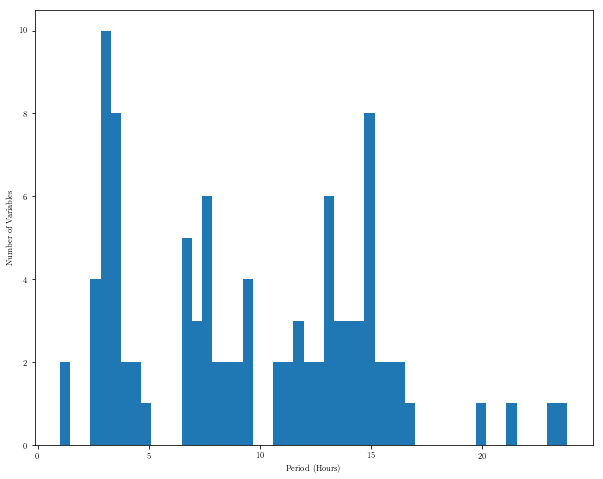

In [8]:
figure(figsize=(10,8))
plt.hist(period,bins=50)
plt.xlabel('Period (Hours)')
plt.ylabel('Number of Variables')
plt.show()

There are 3 peaks:
1. Highest peak is between the period range 0 - 5.5
2. 2nd Highest peak is between the period range 10 - 18
3. 3rd Highest peak is between the period range 6 - 10

49.3025911145
41.0220207267
30.1454106647
50.6886071942
34.850675613
38.2925959551
12.2616544093
9.36061269252
11.8385125304
10.2006267609
12.041016538
11.4077093209


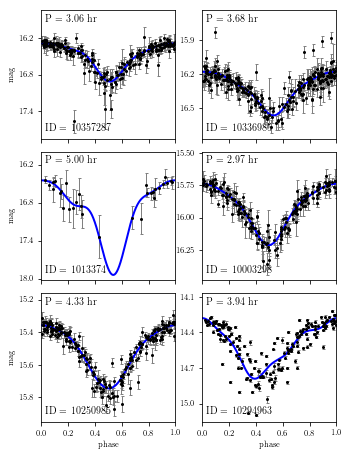

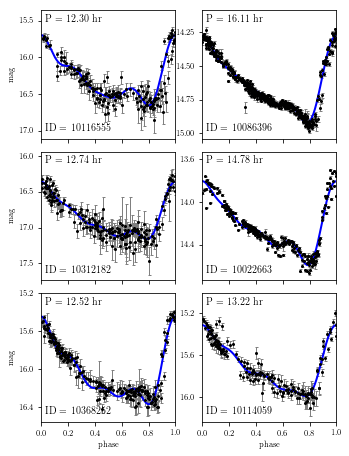

In [14]:
cond_high = np.where((best_period_arr<5.5) & (best_period_arr>0))
cond_2nd_high = np.where((best_period_arr<18) & (best_period_arr>10))

period_highest=ids[cond_high]
period_2nd_highest=ids[cond_2nd_high]

my_set_1 = set(period_highest)
my_list_1 = list(my_set_1)                     # No duplicates
random_ids_1 = random.sample(my_list_1, 6)
myprettyplot1 = plot_lightcurves(results, random_ids_1)

my_set_2 = set(period_2nd_highest)
my_list_2 = list(my_set_2)                     # No duplicates
random_ids_2 = random.sample(my_list_2, 6)
myprettyplot2 = plot_lightcurves(results, random_ids_2)

* The stars of highest peak have a period range between 0 and 5.5 hours, they are RR Lyrae-c stars which pulsate in radial first overtone mode.
* The stars of 2nd highest peak have a period range between 10 and 18 hours, they are RR Lyrae-ab stars which pulsate in radial fundmental mode.

## Extra Credit

In [29]:
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    best_period={}
    best_period_arr=np.zeros(len(ids))
    count=1
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        omega_best = omega[np.argmax(power)]
        best_period[i] =24*2*np.pi/omega_best
        best_period_arr[count-1] =24*2*np.pi/omega_best
        results[i] = [omega, power]
        if(count%50==0):
            print('\n%i results calculated\n'%count)
        count+=1
    return results, best_period, best_period_arr

In [30]:
results_f, best_period_f, best_period_arr_f = compute_best_frequencies(objectID, n_eval=10000, n_retry=5)

 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)
 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 (274 points)
 - computing power for 10071455 (269 points)
 - computing power for 10084768 (388 points)
 - computing 

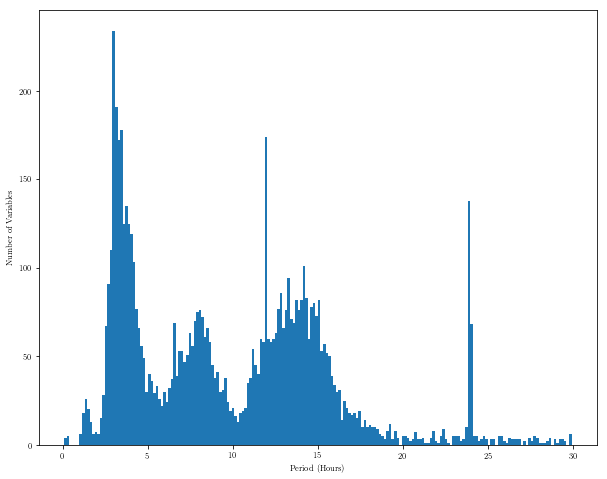

In [48]:
period_f=best_period_arr_f[np.logical_and(best_period_arr_f<30, best_period_arr_f>0)]  #narrows to a proper visible range comprising 6780 stars (out of 7010 stars)
figure(figsize=(10,8))                                                                 #other 230 stars are spread to over 500 hours and hide the features of histogram
plt.hist(period_f,bins=200)
plt.xlabel('Period (Hours)')
plt.ylabel('Number of Variables')
plt.show()

3 clear seperate regions as in previous case of 100 stars is observed, along with another peak at 24 hours is observed having a considerable amount of stars.